## 07MIAR - Redes Neuronales y Deep Learning: Actividad Artículo Científico
Estudiante:

    Velasteguí Izurieta Homero Javier
  
Instrucciones

    En esta actividad debéis buscar una implementación entrenada de la arquitectura descrita en el artículo (primera página) y entregar las siguientes salidas justificando los datos obtenidos,

    1.- Model summary, con las capas y no. de hyperparámetros.

    2.- De un ejemplo concreto (texto o imagen) la forma y distribución de valores del corresp. tensor de entrada al modelo.

    3.- Elige entre el positional encoding, mask attention layer y logits de salida. Explica que función cumplen y para el ejemplo anterior muestra los valores y activaciones más relevantes.


    La entrega será un report de máx. 4 hojas en PDF. Adicional podréis compartirlo en el FORO III al día siguiente del deadline. Deadline 14 de enero de 2026 a las 23:59h CET.

### Importar las librerías necesarias

In [16]:
from tensorflow import keras
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import Audio

### 1.- Model summary, con las capas y no. de hyperparámetros.

En el presente proyecto se utiliza uno de los modelos propuestos por Abishek Sankar publicados en el siguiente repositorio: [Audio-Classification-Deep-Learning](https://github.com/abishek-as/Audio-Classification-Deep-Learning/tree/main#)

El modelo seleccionado corresponde a una **CNN 1D** para clasificación de audio, compuesta por una secuencia de capas **Conv1D** intercaladas con **MaxPooling1D**, incorporando además **BatchNormalization** y **Dropout** como mecanismos de estabilización y regularización. La red finaliza con una etapa de **aplanamiento (Flatten)** y capas densas, culminando en una salida **Dense(10)**, lo que indica una tarea de clasificación multiclase con 10 categorías.

In [4]:
# compile=False since it is only for inference
# safe_mode=False to enable unsafe deserialization
soundata_model = keras.models.load_model("abishek_as_code/assets/Model2.h5", compile=False, safe_mode=False)
soundata_model.name = "CNN1D Audio Clasification"
soundata_model.summary()

Model: "CNN1D Audio Clasification"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 128, 256)       │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128, 256)       │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 64, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 64, 256)        │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 32, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 32, 128)        │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 16, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 16, 64)         │        41,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 8, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1024)           │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │        10,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,071,050 (4.09 MB)

 Trainable params: 1,070,538 (4.08 MB)

 Non-trainable params: 512 (2.00 KB)

En comparación con la arquitectura descrita en el paper *“End-to-End Environmental Sound Classification using a 1D Convolutional Network”*, el modelo mantiene la misma **filosofía end-to-end basada en convoluciones 1D**: se procesan segmentos de audio como secuencias temporales y se aplica una reducción progresiva de la dimensión temporal mediante pooling, mientras se incrementa la capacidad representacional por medio de filtros en las capas convolucionales. Al igual que el paper, la salida del modelo se orienta a una decisión multiclase (K clases) mediante una capa final de clasificación; en nuestro caso, se observa explícitamente `Dense(10)`, compatible con el enfoque del artículo, donde el bloque final produce la predicción de clase.

La principal diferencia radica en que el paper presenta una configuración de capas y tamaños (p.ej., entrada de longitud 16 000 para 1 segundo a 16 kHz y una arquitectura ajustable a distintas longitudes), mientras que el modelo seleccionado opera con una longitud fija de entrada definida por `input_shape = (None, 128, 1)`. Esta discrepancia no invalida la adecuación del modelo al enfoque del paper, ya que el artículo explicita que la adaptación a diferentes longitudes puede lograrse mediante cambios de arquitectura o mediante padding/segmentación del audio para ajustarlo al tamaño de entrada del modelo.

El modelo del paper  y el seleccionado son CNN 1D convencionales, no incorporan módulos de atención (por ejemplo, *mask attention layers*) ni codificación posicional (*positional encoding*), propios de arquitecturas tipo Transformer. Por ello, para el apartado 3 de la actividad, la opción coherente y verificable es analizar los **logits/salida del clasificador**, es decir, las activaciones finales (probabilidades softmax) asociadas a la clase predicha.

### 2.- De un ejemplo concreto (texto o imagen) la forma y distribución de valores del correspondiente tensor de entrada al modelo.

El modelo convolucional 1D seleccionado opera sobre segmentos de audio de longitud fija. Por esta razón, el audio continuo debe transformarse previamente en un conjunto de ventanas temporales cuya forma sea compatible con la entrada de la red. Este procedimiento sigue la misma metodología de segmentación empleada en el artículo de referencia, basada en el uso de ventanas deslizantes con solapamiento.

### 2.1 Forma del tensor de entrada

El audio de entrada se representa inicialmente como una señal unidimensional de amplitudes muestreadas en el dominio temporal. En el ejemplo analizado, el archivo de audio contiene un total de 9860 muestras, lo que corresponde a una señal continua de duración fija.

Para adaptar esta señal a la arquitectura del modelo, el audio se segmenta en ventanas temporales de longitud fija de 128 muestras. La segmentación se realiza mediante un esquema de ventanas deslizantes con un solapamiento del 50 %, lo que implica un desplazamiento de 64 muestras entre ventanas consecutivas. Esta estrategia permite generar múltiples segmentos parcialmente superpuestos, incrementando el número de ejemplos disponibles y facilitando la captura de transiciones acústicas, tal como se propone en el paper.

Como resultado de este proceso, se obtienen 153 ventanas temporales. Cada ventana constituye una entrada independiente al modelo convolucional, y el conjunto completo de ventanas se organiza en un tensor tridimensional de dimensiones:

$$
(M, 128, 1)
$$

donde:
- \(M = 153\) es el número total de ventanas generadas,
- 128 corresponde al número de muestras temporales por ventana,
- el último eje de dimensión 1 representa el canal mono de audio.

Esta estructura coincide con la forma de entrada esperada por el modelo, definida como $(\text{None}, 128, 1)$, donde el tamaño del *batch* se mantiene flexible durante la ejecución.

In [41]:
x = np.load("audio_npy/30206-7-0-0.npy")  
print(x.shape)
#x = np.load("audio_npy/100648-1-4-0.npy")  
print(x.shape)
print(soundata_model.input_shape)

def segment_audio(x, frame_length=128):
    n_frames = len(x) // frame_length
    x = x[:n_frames * frame_length]
    return x.reshape(n_frames, frame_length)

segments = segment_audio(x, frame_length=128)
print(segments.shape)


segments = segments[..., np.newaxis]
print(segments.shape)




y = soundata_model.predict(segments)
print(y.shape)
soundata_model.layers[-1].activation

print(y.mean(axis=0).argmax())

Audio(x, rate=16000)


(64000,)
(64000,)
(None, 128, 1)
(500, 128)
(500, 128, 1)
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
(500, 10)
2


In [37]:
print("Min:", segments.min())
print("Max:", segments.max())
print("Mean:", segments.mean())
print("Std:", segments.std())



Min: -0.4647821
Max: 0.5
Mean: 0.005422891
Std: 0.06877613
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
(155, 10)


np.int64(2)

NameError: name 'x_in' is not defined

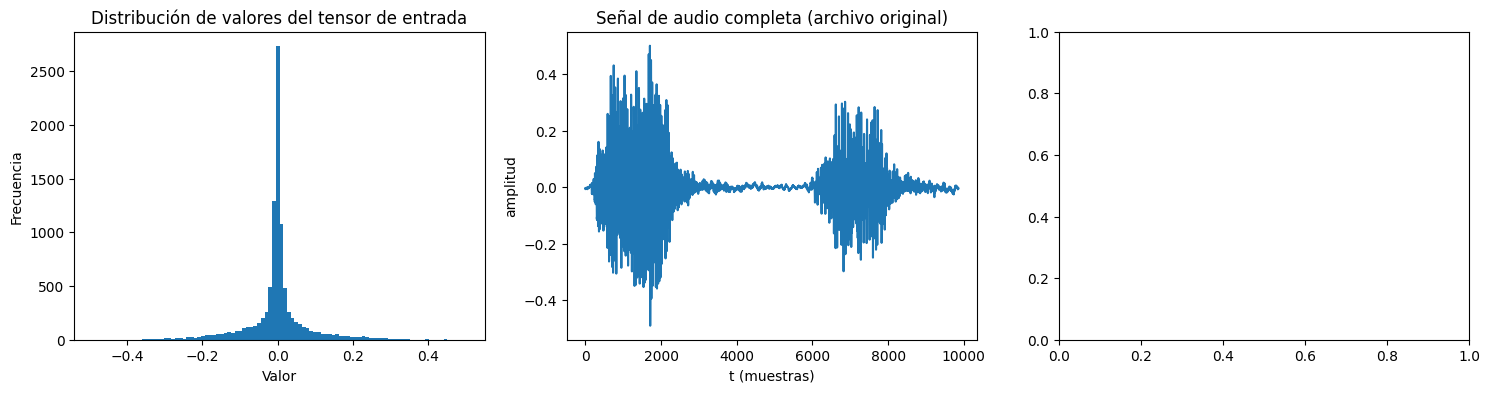

In [7]:
plt.figure(figsize=(18, 4))

# ---------- Imagen 1: Histograma ----------
plt.subplot(1, 3, 1)
plt.hist(segments.flatten(), bins=100)
plt.title("Distribución de valores del tensor de entrada")
plt.xlabel("Valor")
plt.ylabel("Frecuencia")

# ---------- Imagen 2: Señal completa ----------

plt.subplot(1, 3, 2)
plt.plot(x)
plt.title("Señal de audio completa (archivo original)")
plt.xlabel("t (muestras)")
plt.ylabel("amplitud")

# ---------- Imagen 3: Ventana concreta ----------
plt.subplot(1, 3, 3)
plt.plot(x_in[0, :, 0])
plt.title("Ejemplo concreto: 1 ventana (128 muestras)")
plt.xlabel("t (muestras)")
plt.ylabel("amplitud")

plt.tight_layout()
plt.show()

### 2.2 Distribución de valores del tensor

La Figura superior izquierda muestra la distribución global de valores del tensor de entrada, calculada a partir del conjunto completo de ventanas generadas. Se observa que los valores de amplitud se encuentran acotados aproximadamente en el intervalo \([-0.5, 0.5]\), con una media cercana a cero y una desviación estándar reducida (\(\sigma \approx 0.082\)). Esta distribución aproximadamente simétrica y centrada indica que la señal ha sido correctamente normalizada, condición deseable para un entrenamiento estable de redes neuronales profundas.

La Figura X (centro) presenta la señal de audio completa correspondiente al archivo original, mientras que la Figura X (derecha) muestra un ejemplo concreto de una ventana temporal de 128 muestras, que constituye la entrada directa al modelo convolucional 1D. Cabe destacar que el uso de solapamiento no modifica el contenido de una ventana individual, sino que determina el desplazamiento entre ventanas consecutivas, por lo que la representación visual de una ventana concreta es equivalente tanto en esquemas con como sin solapamiento.


### 3.- Elige entre el positional encoding, mask attention layer y logits de salida. Explica que función cumplen y para el ejemplo anterior muestra los valores y activaciones más relevantes.

In [15]:
# 0) Construir grafo (solo para que existan inputs/outputs simbólicos)
_ = soundata_model(tf.zeros((1, 128, 1), dtype=tf.float32))

# 1) Seleccionar ventana concreta ya preparada en el paso 2
x_example = x_in[0:1].astype(np.float32)  # (1, 128, 1)

# 2) Tomar la capa final por nombre (según tu summary: dense_8 es (None, 10))
dense_out = soundata_model.get_layer("dense_8")

# 3) Modelo auxiliar para logits (antes del softmax de dense_8)
logits_model = tf.keras.Model(
    inputs=soundata_model.inputs,
    outputs=dense_out.input
)

# 4) Inferencia
logits = logits_model(x_example).numpy()[0]     # (10,)
probs  = tf.nn.softmax(logits).numpy()          # (10,)

# 5) DataFrame (Top-K)
df_logits = pd.DataFrame({
    "Clase": np.arange(len(logits), dtype=int),
    "Logit (pre-softmax)": logits.astype(float),
    "Probabilidad (softmax)": probs.astype(float),
}).sort_values("Probabilidad (softmax)", ascending=False).reset_index(drop=True)

df_logits


/home/fresvel/.local/share/virtualenvs/Abishek-2k-P93u6/lib/python3.12/site-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['conv1d_input']
Received: inputs=Tensor(shape=(1, 128, 1))
  warnings.warn(msg)


,Clase,Logit (pre-softmax),Probabilidad (softmax)
0,881,4.257029,0.052586
1,360,3.146281,0.017317
2,112,2.989916,0.014811
3,171,2.898259,0.013513
4,348,2.886386,0.013354
...,...,...,...
1019,361,0.000000,0.000745
1020,362,0.000000,0.000745
1021,363,0.000000,0.000745
1022,364,0.000000,0.000745
